In [0]:
from google.colab import files

files.upload()              # 上傳檔案

In [0]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

warnings.filterwarnings('ignore')

def Convert(df, interval, unit):
    period = '{i}{u}'.format(i = interval, u = unit)
    df = df.resample(period).agg({'Open':'first', 
                                  'High':'max', 
                                  'Low':'min',
                                  'Close':'last',
                                  'Volume':'sum'}).dropna(axis=0)
    df.reindex(pd.to_datetime(df.index.strftime('%F %T')))
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

    return df

data = pd.read_csv('TXF_data.csv')

data.Time = pd.to_datetime(data.Time)
data = data.set_index('Time')
data = Convert(data, 1, 'D')

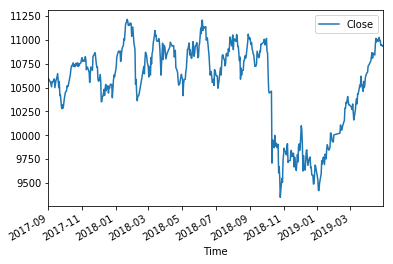

In [11]:
train_data = pd.DataFrame(data[:'2019-04']['Close'])
test_data = pd.DataFrame(data['2019-05':]['Close'])

train_data.plot()
plt.show()

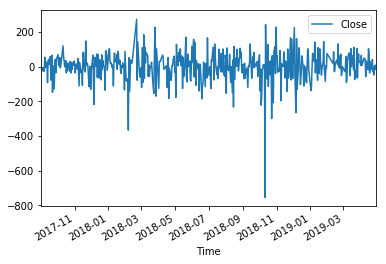

In [12]:
diff = train_data.diff()
diff.dropna(inplace=True)
diff.plot()
plt.show()

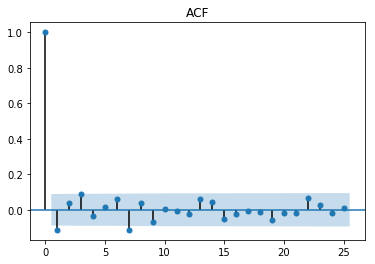

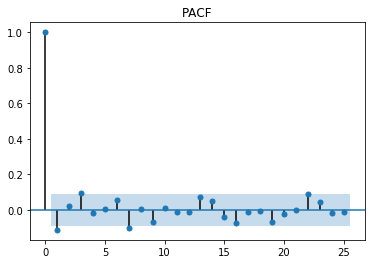

In [13]:
acf = plot_acf(diff,lags=25)
plt.title('ACF')
acf.show()
pacf = plot_pacf(diff,lags=25)
plt.title('PACF')
pacf.show()
plt.show()

In [17]:
plot_data = pd.DataFrame(data['Close'])
plot_data['Predic'] = plot_data['Close']

for idx, row in test_data.iterrows():
    model = ARIMA(plot_data[:idx]['Close'].head(-1),order=(1,1,1))
    arima = model.fit()
    
    _pred = round(arima.forecast()[0][0], 0)
    
    plot_data.loc[idx, 'Predic'] = arima.forecast()[0][0]

    print(idx, ', pred price:', _pred, 'row price:', row['Close'])

2019-05-01 00:00:00 , pred price: 10943.0 row price: 10965.0
2019-05-02 00:00:00 , pred price: 10963.0 row price: 10982.0
2019-05-03 00:00:00 , pred price: 10981.0 row price: 11124.0
2019-05-04 00:00:00 , pred price: 11110.0 row price: 11132.0
2019-05-06 00:00:00 , pred price: 11134.0 row price: 10908.0
2019-05-07 00:00:00 , pred price: 10933.0 row price: 10902.0
2019-05-08 00:00:00 , pred price: 10902.0 row price: 10906.0
2019-05-09 00:00:00 , pred price: 10906.0 row price: 10605.0
2019-05-10 00:00:00 , pred price: 10638.0 row price: 10673.0
2019-05-11 00:00:00 , pred price: 10664.0 row price: 10775.0
2019-05-13 00:00:00 , pred price: 10764.0 row price: 10457.0
2019-05-14 00:00:00 , pred price: 10494.0 row price: 10548.0
2019-05-15 00:00:00 , pred price: 10537.0 row price: 10577.0
2019-05-16 00:00:00 , pred price: 10573.0 row price: 10562.0
2019-05-17 00:00:00 , pred price: 10564.0 row price: 10447.0
2019-05-18 00:00:00 , pred price: 10461.0 row price: 10403.0
2019-05-20 00:00:00 , pr

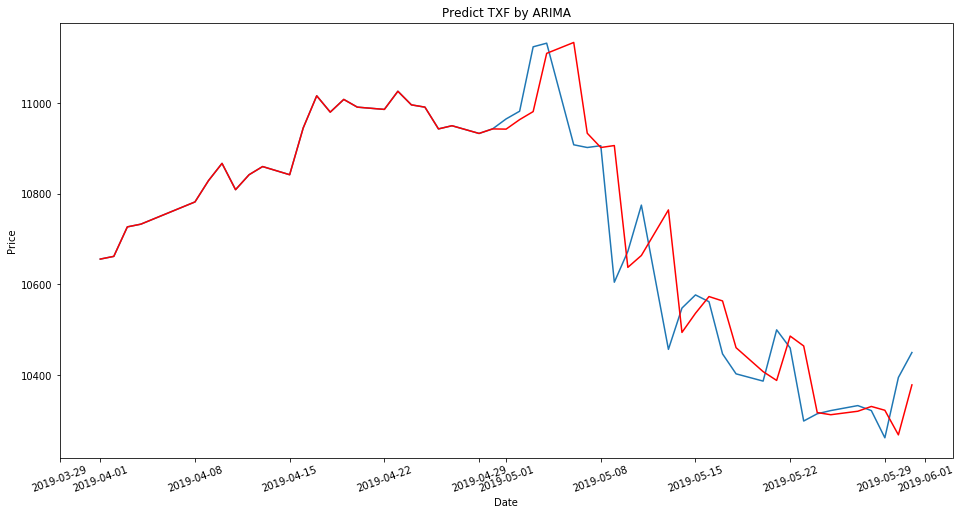

In [0]:
plt.figure(figsize = (16, 8))
plt.plot(plot_data['2019-04':]['Close'].head(-1))
plt.plot(plot_data['2019-04':]['Predic'].head(-1), color='red')
plt.xticks(rotation=20)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predict TXF by ARIMA')
plt.show()